In [15]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [16]:
import pandas as pd
df=pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
df['Age']=df['Age'].fillna(df['Age'].median())


In [19]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [20]:
df.drop('Cabin',  axis=1, inplace=True)

In [21]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

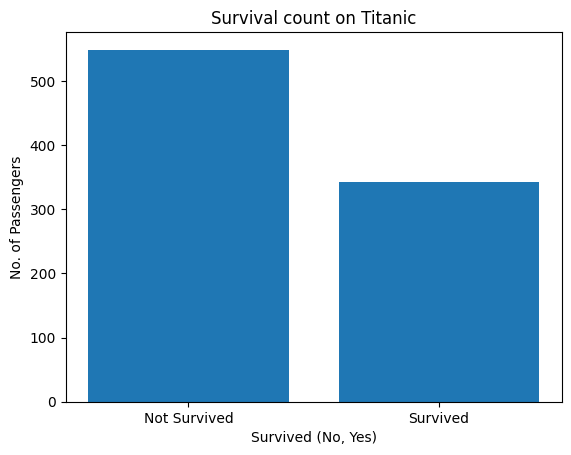

In [29]:
import matplotlib.pyplot as plt
survival_count= df['Survived'].value_counts()
plt.bar(['Not Survived', 'Survived'], survival_count.values)
plt.xlabel("Survived (No, Yes)")
plt.ylabel("No. of Passengers")
plt.title("Survival count on Titanic")
plt.show()

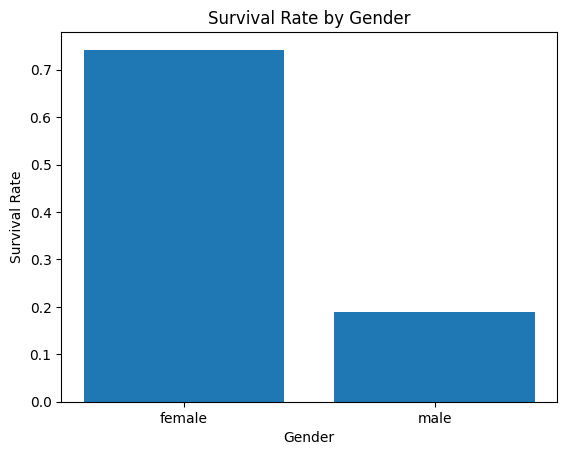

In [30]:
gender_survival = df.groupby('Sex')['Survived'].mean()
plt.bar(gender_survival.index, gender_survival.values)

plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()

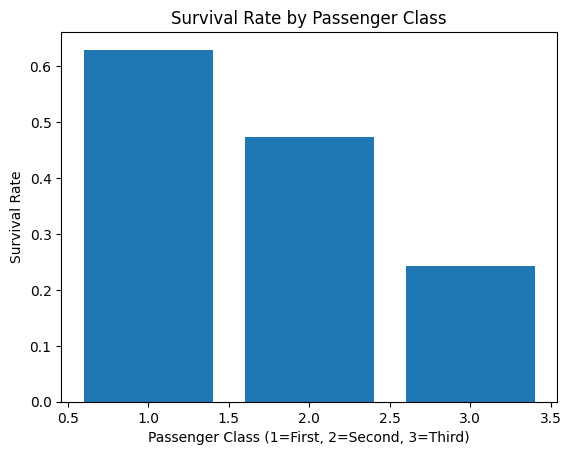

In [31]:
gender_survival = df.groupby('Pclass')['Survived'].mean()
plt.bar(gender_survival.index, gender_survival.values)

plt.xlabel("Passenger Class (1=First, 2=Second, 3=Third)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()

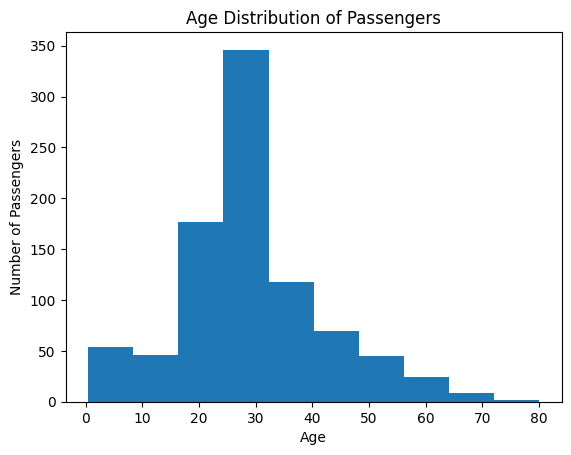

In [32]:
plt.hist(df['Age'], bins=10)

plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Passengers")
plt.show()